<font size="28px" style="font-size:28px;" align="left"><b>Question 1</b></font>

Final_state = [ 0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j -0.70710678+0.j  0.        +0.j]


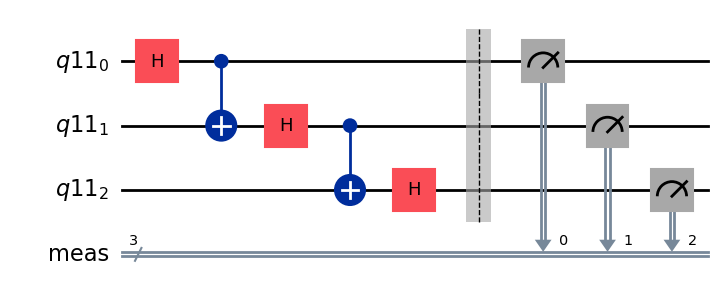

In [28]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
import numpy as np
qreg = QuantumRegister(3)

circuit = QuantumCircuit(qreg)
state = Statevector.from_int(0, 2**3)

circuit.h(qreg[0])
state0 = state.evolve(circuit)

circuit.cx(qreg[0], qreg[1])
state1 = state0.evolve(circuit)

circuit.h(qreg[1])
state2 = state1.evolve(circuit)

circuit.cx(qreg[1], qreg[2])

circuit.h(qreg[2])
state4 = state3.evolve(circuit)

#states = [state0.data, state1.data, state2.data, state3.data, state4.data]

Final_state = np.kron(np.kron(np.kron(np.kron(state0.data, state1.data), state2.data), state3.data), state4.data)

print(f"Final_state = {state4.data}")
circuit.measure_all()
circuit.draw(output="mpl")

{'101': 134, '000': 116, '110': 131, '010': 122, '001': 127, '111': 131, '011': 120, '100': 119}


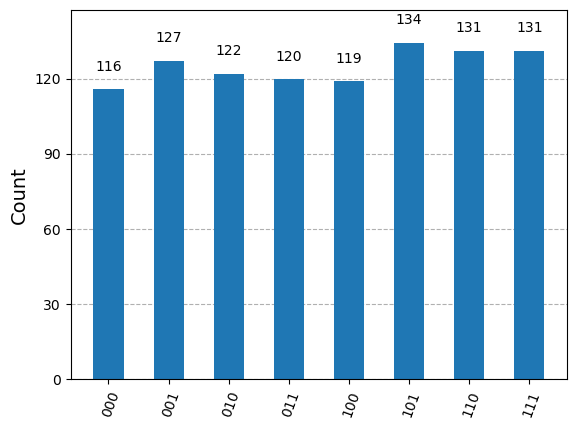

In [36]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

jobs = AerSimulator().run(circuit, shots = 1000)
counts = jobs.result().get_counts()
print(counts)
plot_histogram(counts)

<font size="28px" style="font-size:28px;" align="left"><b>Question 2</b></font>

<font size="28px" style="font-size:28px;" align="left"><b>Question 3</b></font>

In [45]:
def random_quantum_state(num_qubits):
    """
    Generates a random normalized quantum state for a given number of qubits.

    Args:
        num_qubits (int): The number of qubits for the quantum state.
    
    Returns:
        Statevector: A Qiskit Statevector object representing the normalized random quantum state.
    """
    # Number of basis states for the given number of qubits
    num_states = 2 ** num_qubits

    # Generate random complex numbers for each amplitude
    random_state = np.random.randn(num_states) + 1j * np.random.randn(num_states)

    # Normalize the state (so the sum of squared magnitudes is 1)
    normalized_state = random_state / np.linalg.norm(random_state)

    # Return the normalized state as a Qiskit Statevector
    return Statevector(normalized_state)

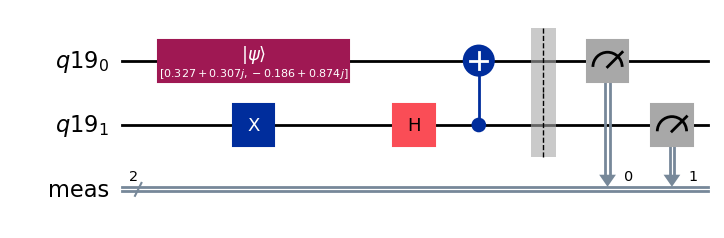

In [56]:
psi = random_quantum_state(1)
qreg_1 = QuantumRegister(2)
circuit_1 = QuantumCircuit(qreg_1)
circuit_1.initialize(psi.data, qreg_1[0])
circuit_1.x(qreg_1[1])
circuit_1.h(qreg_1[1])
circuit_1.cx(qreg_1[1],qreg_1[0])

circuit_1.measure_all()
circuit_1.draw(output="mpl")

{'00': 88, '01': 389, '10': 423, '11': 100}


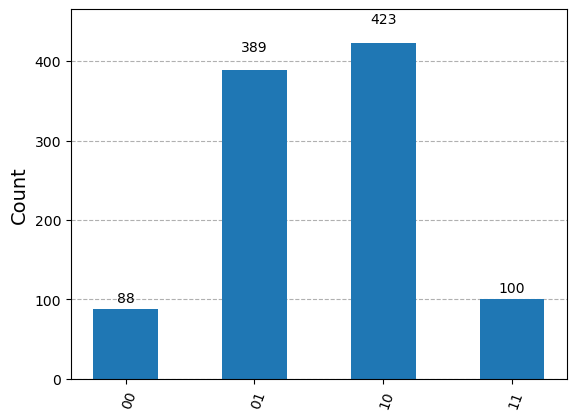

In [64]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

jobs = AerSimulator().run(circuit_1, shots = 1000)
counts = jobs.result().get_counts()
print(counts)
plot_histogram(counts)

<font size="28px" style="font-size:28px;" align="left"><b>Question 4</b></font>

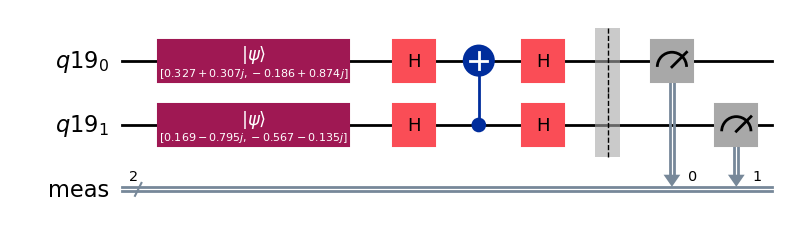

In [73]:
psi_1 = random_quantum_state(1)
psi_2 = random_quantum_state(1)

qreg_2 = QuantumRegister(2)
circuit_2 = QuantumCircuit(qreg_1)

circuit_2.initialize(psi.data, qreg_1[0])
circuit_2.initialize(psi_2.data, qreg_1[1])

circuit_2.h(qreg_1[0])
circuit_2.h(qreg_1[1])
circuit_2.cx(qreg_1[1],qreg_1[0])
circuit_2.h(qreg_1[0])
circuit_2.h(qreg_1[1])

circuit_2.measure_all()
circuit_2.draw(output="mpl")

{'00': 478, '10': 522}


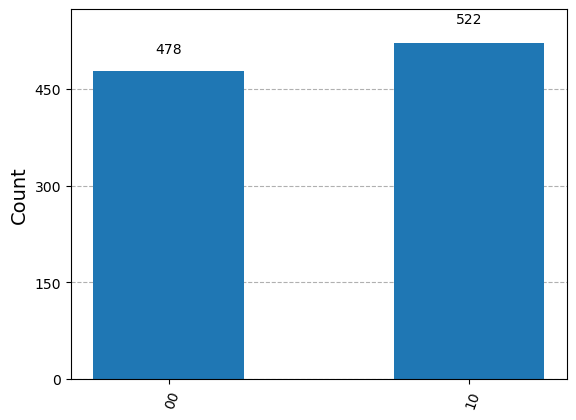

In [71]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

jobs = AerSimulator().run(circuit_2, shots = 1000)
counts = jobs.result().get_counts()
print(counts)
plot_histogram(counts)